In [6]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

trial_df = pd.read_csv ('../../data/trial.csv')

trial_df.head()

,sent-id,topic,phrase,phrase_number,genre,timestamp,user,phrase_tokenized,num_statements,statement_spans,notes
0,5035,berlin-blockade,Diese Flugzeuge transportierten Nahrung und Br...,21_long,Politik|Seiten_mit_defekten_Dateilinks,2016-01-24T11:51:34Z,a87abd4ebcc677b326b5b117860e863b,0:=Diese 1:=Flugzeuge 2:=transportierten 3:=Na...,2,"[[3],[5]]",conjunction
1,5064,berliner-fernsehturm,Man kann mit einem Fahr-stuhl nach oben fahren.,8_long,Ohne_Kategorie|Seiten_mit_defekten_Dateilinks,2023-07-15T18:02:33Z,af7adc773949650e35f6f40ea06c535c,0:=Man 1:=kann 2:=mit 3:=einem 4:=Fahr-stuhl 5...,2,"[[2,4],[5,6]]",prepositional
2,1049,alex-honnold,Alex Honnold ist ein bekannter Free Solo Klett...,0_short,Sport|Personen|Seiten_mit_defekten_Dateilinks,2021-07-16T21:06:31Z,e54ca469914bc262b958dc327fbe1253,0:=Alex 1:=Honnold 2:=ist 3:=ein 4:=bekannter ...,2,"[[4],[5,6,7]]",single adjective
3,1024,aleppo,"Und neue, moderne Wohn-blöcke gebaut.",11_long,Städte|Seiten_mit_defekten_Dateilinks,2016-09-26T14:57:00Z,7b5adf57ed2178795004f4c052333f37,"0:=Und 1:=neue, 2:=moderne 3:=Wohn-blöcke 4:=g...",2,"[[1],[2]]",sequence of adjectives
4,5049,berliner-erklarung-alliierte,Die Siegermächte regierten ab sofort in ihrer ...,8_long,Ohne_Kategorie|Seiten_mit_defekten_Dateilinks,2015-12-16T18:40:15Z,3d503e53a51c622cb86f9b0570441d1d,0:=Die 1:=Siegermächte 2:=regierten 3:=ab 4:=s...,2,"[[3,4],[5,6,7,8]]",adverbials


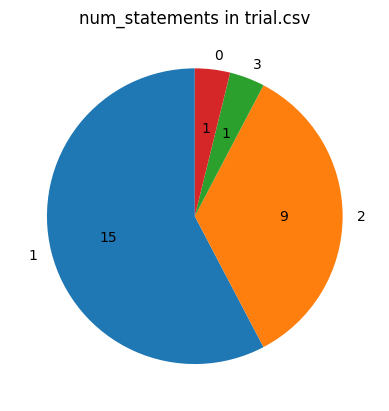

In [7]:
explode_values=[0, 0, 0, 0, 0,0.7,1.5,1.5]
trial_total = trial_df['num_statements'].value_counts().values.sum()

def fmt(x):
    return '{:.0f}'.format(trial_total*x/100)

plt.pie(trial_df['num_statements'].value_counts().values, labels=trial_df['num_statements'].value_counts().index,autopct=fmt, startangle=90,
                    explode=explode_values[:len(trial_df['num_statements'].value_counts())])
plt.title("num_statements in trial.csv")
plt.show()

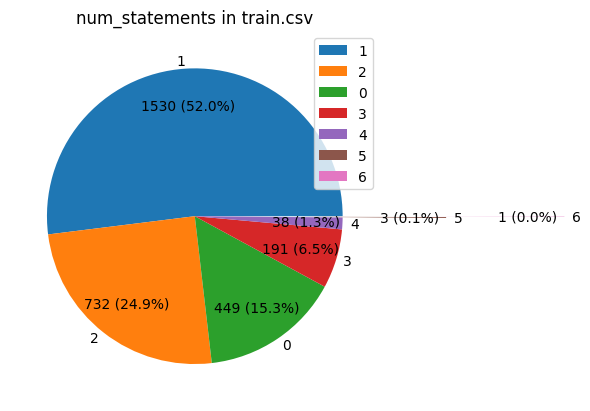

In [8]:
train_df = pd.read_csv ('../../data/train.csv')
train_total = train_df['num_statements'].value_counts().values.sum()



def fmt(x):
    return '{:.0f} ({:.1f}%)'.format(train_total*x/100,x)


plt.pie(train_df['num_statements'].value_counts().values,
                    autopct=fmt,
                    labels=train_df['num_statements'].value_counts().index, 
                    startangle=0,
                    labeldistance=1.05,
                    pctdistance=0.75,
                    explode=explode_values[:len(train_df['num_statements'].value_counts())])
plt.title("num_statements in train.csv")
plt.legend()
plt.show()